In [1]:
#import all the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [2]:
churn_df= pd.read_csv("telecom_churn_data.csv", encoding = "ISO-8859-1", low_memory=False )

In [3]:
churn_df.shape

(99999, 226)

In [4]:
churn_df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [5]:
churn_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [6]:
churn_df.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

#### First Filtering high-value customers

In [7]:
#Derive total data recharge amounts

churn_df["t_rech_data_ammount_6"] = churn_df["total_rech_data_6"]  * churn_df['av_rech_amt_data_6']
churn_df["t_rech_data_ammount_7"] = churn_df["total_rech_data_7"]  * churn_df['av_rech_amt_data_7']
churn_df["t_rech_data_ammount_8"] = churn_df["total_rech_data_8"]  * churn_df['av_rech_amt_data_8']
churn_df["t_rech_data_ammount_9"] = churn_df["total_rech_data_9"]  * churn_df['av_rech_amt_data_9']

In [8]:
#Dropping the columns

churn_df.drop(["total_rech_data_6", "total_rech_data_7", "total_rech_data_8", "total_rech_data_9", 
                'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9'], axis=1, inplace=True)



In [9]:
churn_df.shape

(99999, 222)

In [10]:
#Average of Recharge Amount in 6th and 7th Month
Average_rechage_amount = (churn_df["total_rech_amt_6"].fillna(0) + churn_df["t_rech_data_ammount_6"].fillna(0) + 
churn_df["total_rech_amt_7"].fillna(0) + churn_df["t_rech_data_ammount_7"].fillna(0))/2.0



In [11]:
#70th Percentile of Avg Recharge Amount
Average_rechage_amount.quantile([.1, .25, .5, .70])

0.10     60.0
0.25    128.0
0.50    275.0
0.70    478.0
dtype: float64

In [12]:
churn_df = churn_df[Average_rechage_amount >= 478]

In [13]:
churn_df.shape

(30001, 222)

### Data Cleaning & EDA

In [14]:
Missing_val=round((churn_df.isnull().sum()*100/len(churn_df.index)),2)

In [15]:
# Dropping the columns having more than 40% null values. 

Missing_values = [col for col in churn_df.columns if churn_df[col].isna().mean()>=0.4]
churn_df = churn_df.drop(Missing_values, axis= 1)

In [16]:
churn_df.shape

(30001, 186)

In [17]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Columns: 186 entries, mobile_number to sep_vbc_3g
dtypes: float64(143), int64(35), object(8)
memory usage: 42.8+ MB


In [18]:
Date_datatype = churn_df.select_dtypes(include=['object']).columns

In [19]:
Date_datatype

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9'],
      dtype='object')

#### For the sake our convience we can leave last 9th month recharge done by the customer it might be useful for fields like dateof_last_rech_X, 'total_rech_amt_X', 'max_rech_amt

In [20]:
churn_df=churn_df.drop(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8'],axis=1)

In [21]:
churn_df.shape

(30001, 179)

In [22]:
#Tag Churners

In [23]:
churn_df[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00
8,34.91,142.18,0.00,0.00
21,252.61,1031.53,0.00,0.00
23,127.48,127.63,13.93,314.74


In [24]:
#churned customers (churn=1, else 0) 
churn_df['churn'] = np.where(churn_df[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0,1,0)

In [25]:
churn_df['churn'].head(10)

0     1
7     1
8     0
21    0
23    0
33    0
38    0
41    0
48    0
53    0
Name: churn, dtype: int32

In [26]:
#Remove All 9th Month related columns
drop_cloumns_9 = [col for col in churn_df.columns if '_9' in col]

churn_df.drop(drop_cloumns_9, axis=1, inplace=True)

churn_df.shape

(30001, 137)

#### filtering to good phase and removing the columns

In [27]:
churn_df['monthly_2g_good'] = (churn_df['monthly_2g_6'] + churn_df['monthly_2g_7'])/2
churn_df['monthly_3g_good'] = (churn_df['monthly_3g_6'] + churn_df['monthly_3g_7'])/2
churn_df['sachet_2g_good'] = (churn_df['sachet_2g_6']+ churn_df['sachet_2g_7'])/2
churn_df['sachet_3g_good'] = (churn_df['sachet_3g_6'] + churn_df['sachet_3g_7'])/2
churn_df['vbc_good'] = (churn_df['jun_vbc_3g'] + churn_df['jul_vbc_3g'])/2

In [28]:
churn_df= churn_df.drop(['monthly_2g_6', 'monthly_2g_7','monthly_3g_6','monthly_3g_7',
             'sachet_2g_6','sachet_2g_7','sachet_3g_6','sachet_3g_7',
            'jun_vbc_3g','jul_vbc_3g'], axis=1)

In [29]:
churn_df['total_rech_num_good'] = (churn_df['total_rech_num_6'] + churn_df['total_rech_num_7'])/2
churn_df['total_rech_amt_good'] = (churn_df['total_rech_amt_6'] + churn_df['total_rech_amt_7'])/2
churn_df['max_rech_amt_good'] = (churn_df['max_rech_amt_6']+ churn_df['max_rech_amt_7'])/2
churn_df['last_day_rch_amt_good'] = (churn_df['last_day_rch_amt_6'] + churn_df['last_day_rch_amt_7'])/2

In [30]:
churn_df= churn_df.drop(['total_rech_num_6', 'total_rech_num_7','total_rech_amt_6','total_rech_amt_7','max_rech_amt_6','max_rech_amt_7',
             'last_day_rch_amt_6','last_day_rch_amt_7'], axis=1)

In [31]:
churn_df['arpu_good'] = (churn_df['arpu_6'] + churn_df['arpu_7'])/2
churn_df['onnet_mou_good'] = (churn_df['onnet_mou_6'] + churn_df['onnet_mou_7'])/2
churn_df['offnet_mou_good'] = (churn_df['offnet_mou_6']+ churn_df['offnet_mou_7'])/2
churn_df['total_og_mou_good'] = (churn_df['total_og_mou_6'] + churn_df['total_og_mou_7'])/2
churn_df['total_ic_mou_good'] = (churn_df['total_ic_mou_6'] + churn_df['total_ic_mou_7'])/2
churn_df['vol_2g_mb_good'] = (churn_df['vol_2g_mb_6'] + churn_df['vol_2g_mb_7'])/2
churn_df['vol_3g_mb_good'] = (churn_df['vol_3g_mb_6']+ churn_df['vol_3g_mb_7'])/2

In [32]:
churn_df= churn_df.drop(['arpu_6', 'arpu_7',
             'onnet_mou_6','onnet_mou_7',
             'offnet_mou_6','offnet_mou_7',
             'total_og_mou_6','total_og_mou_7',
             'total_ic_mou_6','total_ic_mou_7',
             'vol_2g_mb_6','vol_2g_mb_7',
             'vol_3g_mb_6','vol_3g_mb_7',            
            ], axis=1)

In [33]:
churn_df.shape

(30001, 121)

In [34]:
#Lets remove all the Local/STD /ISD call. We will consider only total Incoming, total outgoing, 2g vol and 3g vol to consider subriber usage activity¶
churn_df= churn_df.drop(['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','roam_ic_mou_6',
       'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6',
       'roam_og_mou_7', 'roam_og_mou_8', 
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7',
       'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
        'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8','std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 
       'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8',
      'std_og_t2c_mou_6', 'std_og_t2c_mou_7',
       'std_og_t2c_mou_8', 'std_og_mou_6',
       'std_og_mou_7', 'std_og_mou_8','isd_og_mou_6',
       'isd_og_mou_7', 'isd_og_mou_8','spl_og_mou_6',
       'spl_og_mou_7', 'spl_og_mou_8','og_others_6',
       'og_others_7', 'og_others_8',
       'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8',
        'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6',
       'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 
       'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8',
       'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8',
       'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7',
       'std_ic_t2m_mou_8',  'std_ic_t2f_mou_6',
       'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8',
       'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8',
       'spl_ic_mou_6', 'spl_ic_mou_7',
       'spl_ic_mou_8',  'isd_ic_mou_6', 'isd_ic_mou_7',
       'isd_ic_mou_8',  'ic_others_6', 'ic_others_7',
       'ic_others_8'], axis=1)

In [35]:
churn_df.shape

(30001, 37)

In [36]:
#Find Highly correlated data and drop Highly Correlated Columns
cor = churn_df.corr()
cor.loc[:,:] = np.tril(cor, k=-1)
cor = cor.stack()
cor[(cor > 0.60) | (cor < -0.60)].sort_values()

monthly_2g_good        monthly_2g_8           0.604100
aug_vbc_3g             vol_3g_mb_8            0.607689
monthly_3g_8           vol_3g_mb_8            0.628812
vol_3g_mb_good         vbc_good               0.643199
                       monthly_3g_good        0.645618
sachet_3g_good         sachet_3g_8            0.647244
vol_2g_mb_good         vol_2g_mb_8            0.652133
max_rech_amt_good      max_rech_amt_8         0.655936
monthly_3g_good        monthly_3g_8           0.684383
last_day_rch_amt_good  max_rech_amt_good      0.698503
vbc_good               aug_vbc_3g             0.700257
last_day_rch_amt_8     max_rech_amt_8         0.701826
total_og_mou_good      onnet_mou_good         0.714048
sachet_2g_good         sachet_2g_8            0.716388
total_rech_num_good    total_rech_num_8       0.717581
total_og_mou_good      total_og_mou_8         0.725865
total_og_mou_8         onnet_mou_8            0.728255
total_og_mou_good      offnet_mou_good        0.732974
total_rech

Text(0.5, 1.0, 'Churn Distribution')

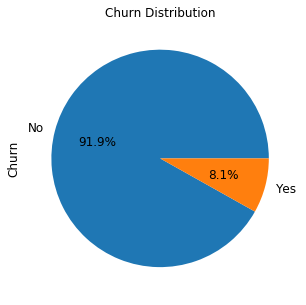

In [37]:
#Churn Distribution
churn_rate = (churn_df['churn'].value_counts()*100.0 /len(churn_df)).plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           

churn_rate.set_ylabel('Churn',fontsize = 12)
churn_rate.set_title('Churn Distribution', fontsize = 12)

#### From the above diagram we can say that 91.9% of people won't churn

In [38]:
round(100*(churn_df.isnull().sum()/len(churn_df.index)),2)

mobile_number            0.00
circle_id                0.00
arpu_8                   0.00
onnet_mou_8              3.91
offnet_mou_8             3.91
total_og_mou_8           0.00
total_ic_mou_8           0.00
total_rech_num_8         0.00
total_rech_amt_8         0.00
max_rech_amt_8           0.00
last_day_rch_amt_8       0.00
vol_2g_mb_8              0.00
vol_3g_mb_8              0.00
monthly_2g_8             0.00
sachet_2g_8              0.00
monthly_3g_8             0.00
sachet_3g_8              0.00
aon                      0.00
aug_vbc_3g               0.00
sep_vbc_3g               0.00
churn                    0.00
monthly_2g_good          0.00
monthly_3g_good          0.00
sachet_2g_good           0.00
sachet_3g_good           0.00
vbc_good                 0.00
total_rech_num_good      0.00
total_rech_amt_good      0.00
max_rech_amt_good        0.00
last_day_rch_amt_good    0.00
arpu_good                0.00
onnet_mou_good           2.61
offnet_mou_good          2.61
total_og_m

In [39]:
churn_df.onnet_mou_8.fillna(0, inplace=True)
churn_df.offnet_mou_8.fillna(0, inplace=True)
churn_df.onnet_mou_good.fillna(0, inplace=True)
churn_df.offnet_mou_good.fillna(0, inplace=True)

In [40]:
round(100*(churn_df.isnull().sum()/len(churn_df.index)),2)

mobile_number            0.0
circle_id                0.0
arpu_8                   0.0
onnet_mou_8              0.0
offnet_mou_8             0.0
total_og_mou_8           0.0
total_ic_mou_8           0.0
total_rech_num_8         0.0
total_rech_amt_8         0.0
max_rech_amt_8           0.0
last_day_rch_amt_8       0.0
vol_2g_mb_8              0.0
vol_3g_mb_8              0.0
monthly_2g_8             0.0
sachet_2g_8              0.0
monthly_3g_8             0.0
sachet_3g_8              0.0
aon                      0.0
aug_vbc_3g               0.0
sep_vbc_3g               0.0
churn                    0.0
monthly_2g_good          0.0
monthly_3g_good          0.0
sachet_2g_good           0.0
sachet_3g_good           0.0
vbc_good                 0.0
total_rech_num_good      0.0
total_rech_amt_good      0.0
max_rech_amt_good        0.0
last_day_rch_amt_good    0.0
arpu_good                0.0
onnet_mou_good           0.0
offnet_mou_good          0.0
total_og_mou_good        0.0
total_ic_mou_g

### Model Building

In [41]:
Drop_var = churn_df.drop(['churn'],1)

In [42]:
model_normalized=(Drop_var-Drop_var.mean())/Drop_var.std()
churn_df = pd.concat([churn_df['churn'],model_normalized],axis=1)
churn_df.head()

,churn,mobile_number,circle_id,arpu_8,onnet_mou_8,offnet_mou_8,total_og_mou_8,total_ic_mou_8,total_rech_num_8,total_rech_amt_8,...,total_rech_amt_good,max_rech_amt_good,last_day_rch_amt_good,arpu_good,onnet_mou_good,offnet_mou_good,total_og_mou_good,total_ic_mou_good,vol_2g_mb_good,vol_3g_mb_good
0,1,-0.526007,NaN,-0.587285,-0.510663,-0.695090,-0.787575,-0.759972,-0.859667,-0.543751,...,-0.686400,0.526980,1.305768,-0.822351,-0.599146,-0.816386,-0.950145,-0.835848,-0.366911,-0.285793
7,1,-0.730315,NaN,5.304948,-0.396604,-0.019016,-0.287687,0.412036,-0.320547,4.995755,...,1.017880,6.577833,-0.867994,1.511665,-0.470832,0.298189,-0.108550,0.851640,-0.419322,-0.425278
8,0,0.461277,NaN,-0.739570,-0.434144,-0.411974,-0.542656,-0.729239,0.434222,-0.759703,...,-0.274888,-0.316118,-0.652343,-0.288816,0.272915,-0.624954,-0.228830,-0.647297,0.173949,0.021723
21,0,1.328823,NaN,0.257314,-0.324949,1.344873,0.737869,-0.052282,1.835934,0.218626,...,-0.040016,-0.783065,-0.652343,-0.008219,-0.331707,0.990595,0.499460,-0.352923,-0.419322,-0.425278
23,0,-0.461295,NaN,-0.282157,-0.437416,-0.267988,-0.445694,0.050964,-0.644019,-0.237818,...,-0.841688,-0.526893,-0.095963,-0.989774,-0.485542,-0.625522,-0.739572,-0.347951,-0.418523,-0.068671


In [43]:
#No use of circle id hence dropping the circleid value
churn_df=churn_df.drop(['circle_id'],axis=1)

In [44]:
churn_df.shape

(30001, 36)

In [45]:
X = churn_df.drop(['churn'], axis=1)
y = churn_df['churn']

churn_df.drop('churn', axis=1, inplace=True)

In [46]:
# Split in train & Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=100)

### using PCA

In [47]:
#Improting the PCA module
from sklearn.decomposition import PCA
PCA_Model = PCA(svd_solver='randomized', random_state=42)

In [48]:
#Applying PCA on the train data
PCA_Model.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [49]:
col = list(churn_df.columns)
Model_pca = pd.DataFrame({'PC1':PCA_Model.components_[0],'PC2':PCA_Model.components_[1], 'PC3':PCA_Model.components_[2],'Feature':col})
Model_pca.head()

,PC1,PC2,PC3,Feature
0,0.022406,0.009244,-0.079389,mobile_number
1,0.346628,0.020241,0.098679,arpu_8
2,0.169718,-0.166610,0.056561,onnet_mou_8
3,0.233861,-0.133357,0.015828,offnet_mou_8
4,0.263865,-0.201103,0.051435,total_og_mou_8


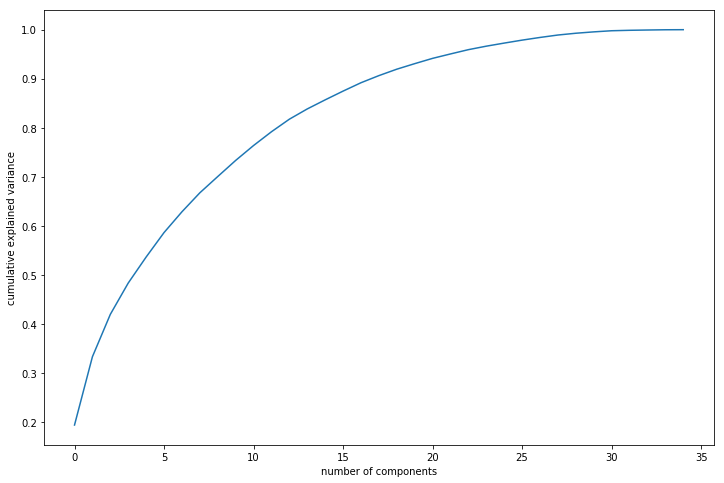

In [50]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(PCA_Model.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [51]:
np.cumsum(np.round(PCA_Model.explained_variance_ratio_, decimals=4)*100)

array([19.34, 33.27, 41.92, 48.31, 53.62, 58.61, 62.85, 66.72, 70.04,
       73.32, 76.36, 79.17, 81.73, 83.82, 85.67, 87.46, 89.17, 90.62,
       91.93, 93.06, 94.14, 95.04, 95.91, 96.62, 97.25, 97.85, 98.4 ,
       98.9 , 99.26, 99.54, 99.77, 99.86, 99.92, 99.97, 99.99])

##### From the above statement we can say that 20 features is enough to give 90 percent variance

#### Logistic Regression

In [52]:
import statsmodels.api as sm
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20964
Model Family:                Binomial   Df Model:                           35
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3930.0
Date:                Mon, 04 Nov 2019   Deviance:                       7860.1
Time:                        12:38:08   Pearson chi2:                 4.41e+06
No. Iterations:                    10   Covariance Type:             nonrobust
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -4.2576      0.081    -52.364      0.000      -4.417      -4.098
mobile_number             0.0029      0.030      0.097      0.923      -0.055       0.061
arpu_8                   -0.3302      0.169     -1.948      0.051      -0.662       0.002
onnet_mou_8               0.8875      0.129      6.858      0.000       0.634       1.141
offnet_mou_8              0.6802      0.147      4.641      0.000       0.393       0.968
total_og_mou_8           -1.6952      0.178     -9.535      0.000      -2.044      -1.347
total_ic_mou_8           -2.1930      0.129    -17.058      0.000      -2.445      -1.941
total_rech_num_8         -0.4370      0.077     -5.707      0.000      -0.587      -0.287
total_rech_amt_8         -0.2086      0.155     -1.345      0.179      -0.513       0.095
max_rech_amt_8            0.0661      0.062      1.073      0.283      -0.055       0.187
last_day_rch_amt_8       -0.4009      0.060     -6.729      0.000      -0.518      -0.284
vol_2g_mb_8              -0.6152      0.113     -5.442      0.000      -0.837      -0.394
vol_3g_mb_8              -0.0268      0.090     -0.299      0.765      -0.202       0.149
monthly_2g_8             -0.4215      0.079     -5.304      0.000      -0.577      -0.266
sachet_2g_8              -0.6985      0.093     -7.528      0.000      -0.880      -0.517
monthly_3g_8             -0.3324      0.088     -3.789      0.000      -0.504      -0.160
sachet_3g_8              -0.2778      0.090     -3.093      0.002      -0.454      -0.102
aon                      -0.2492      0.040     -6.288      0.000      -0.327      -0.172
aug_vbc_3g               -0.2650      0.088     -3.013      0.003      -0.437      -0.093
sep_vbc_3g               -1.0558      0.281     -3.760      0.000      -1.606      -0.505
monthly_2g_good          -0.2119      0.054     -3.940      0.000      -0.317      -0.106
monthly_3g_good          -0.0503      0.060     -0.845      0.398      -0.167       0.066
sachet_2g_good            0.0809      0.046      1.777      0.076      -0.008       0.170
sachet_3g_good            0.1514      0.044      3.425      0.001       0.065       0.238
vbc_good                  0.0859      0.060      1.428      0.153      -0.032       0.204
total_rech_num_good       0.0603      0.047      1.285      0.199      -0.032       0.152
total_rech_amt_good      -0.1301      0.170     -0.767      0.443      -0.463       0.202
max_rech_amt_good         0.1056      0.053      1.976      0.048       0.001       0.210
last_day_rch_amt_good    -0.0264      0.043     -0.613      0.540      -0.111       0.058
arpu_good                 0.7085      0.159      4.442      0.000       0.396       1.021
onnet_mou_good           -0.1227      0.112     -1.100      0.271      -0.341       0.096
offnet_mou_good          -0.0646      0.116     -0.555      0.579      -0.293       0.164
total_og_mou

####  Feature Selection Using RFE

In [53]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [54]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [55]:
rfe.support_

array([False,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False,  True, False, False, False,  True,  True, False])

In [56]:
col = X_train.columns[rfe.support_]

In [57]:
col

Index(['arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'total_og_mou_8',
       'total_ic_mou_8', 'total_rech_num_8', 'total_rech_amt_8',
       'last_day_rch_amt_8', 'vol_2g_mb_8', 'monthly_2g_8', 'sachet_2g_8',
       'monthly_3g_8', 'sachet_3g_8', 'aon', 'aug_vbc_3g', 'sep_vbc_3g',
       'monthly_2g_good', 'arpu_good', 'total_ic_mou_good', 'vol_2g_mb_good'],
      dtype='object')

### Assessing the model with StatsModels

In [58]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20979
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3947.5
Date:                Mon, 04 Nov 2019   Deviance:                       7895.0
Time:                        12:38:17   Pearson chi2:                 3.82e+06
No. Iterations:                    10   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.2407      0.080    -53.193      0.000      -4.397      -4.084
arpu_8                -0.3189      0.148     -2.149      0.032      -0.610      -0.028
onnet_mou_8            0.8485      0.105      8.107      0.000       0.643       1.054
offnet_mou_8           0.7097      0.116      6.139      0.000       0.483       0.936
total_og_mou_8        -1.6360      0.151    -10.816      0.000      -1.932      -1.340
total_ic_mou_8        -2.2176      0.126    -17.567      0.000      -2.465      -1.970
total_rech_num_8      -0.4217      0.061     -6.864      0.000      -0.542      -0.301
total_rech_amt_8      -0.2629      0.133     -1.983      0.047      -0.523      -0.003
last_day_rch_amt_8    -0.3699      0.055     -6.727      0.000      -0.478      -0.262
vol_2g_mb_8           -0.6187      0.111     -5.566      0.000      -0.837      -0.401
monthly_2g_8          -0.4147      0.077     -5.406      0.000      -0.565      -0.264
sachet_2g_8           -0.6355      0.083     -7.701      0.000      -0.797      -0.474
monthly_3g_8          -0.3918      0.066     -5.956      0.000      -0.521      -0.263
sachet_3g_8           -0.1289      0.068     -1.885      0.059      -0.263       0.005
aon                   -0.2516      0.038     -6.666      0.000      -0.326      -0.178
aug_vbc_3g            -0.2195      0.073     -3.016      0.003      -0.362      -0.077
sep_vbc_3g            -1.0139      0.278     -3.647      0.000      -1.559      -0.469
monthly_2g_good       -0.2389      0.050     -4.778      0.000      -0.337      -0.141
arpu_good              0.6590      0.047     14.163      0.000       0.568       0.750
total_ic_mou_good      0.4610      0.052      8.872      0.000       0.359       0.563
vol_2g_mb_good         0.1897      0.041      4.674      0.000       0.110       0.269
======================================================================================
"""

In [59]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [60]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
Vif_m = pd.DataFrame()
Vif_m['Features'] = X_train[col].columns
Vif_m['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
Vif_m['VIF'] = round(Vif_m['VIF'], 2)
Vif_m = Vif_m.sort_values(by = "VIF", ascending = False)
Vif_m

,Features,VIF
3,total_og_mou_8,50.25
2,offnet_mou_8,24.88
1,onnet_mou_8,22.10
6,total_rech_amt_8,14.58
0,arpu_8,14.47
4,total_ic_mou_8,3.11
18,total_ic_mou_good,3.02
17,arpu_good,2.98
8,vol_2g_mb_8,1.90
19,vol_2g_mb_good,1.88


In [61]:
#lets drop the  total_og_mou_8
col_names=['arpu_8', 'onnet_mou_8', 'offnet_mou_8',
       'total_ic_mou_8', 'total_rech_num_8', 'total_rech_amt_8',
       'last_day_rch_amt_8', 'vol_2g_mb_8', 'monthly_2g_8', 'sachet_2g_8',
       'monthly_3g_8', 'sachet_3g_8', 'aon', 'aug_vbc_3g', 'sep_vbc_3g',
       'monthly_2g_good', 'arpu_good', 'total_ic_mou_good', 'vol_2g_mb_good']

##### There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex The variable 'total_og_mou_8' has the highest VIF. So let's start by dropping that.

In [62]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col_names])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20980
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3990.8
Date:                Mon, 04 Nov 2019   Deviance:                       7981.6
Time:                        12:38:21   Pearson chi2:                 7.12e+06
No. Iterations:                    10   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.2448      0.080    -52.890      0.000      -4.402      -4.088
arpu_8                -0.2149      0.138     -1.558      0.119      -0.485       0.055
onnet_mou_8           -0.1888      0.050     -3.748      0.000      -0.288      -0.090
offnet_mou_8          -0.3322      0.064     -5.213      0.000      -0.457      -0.207
total_ic_mou_8        -2.4559      0.126    -19.428      0.000      -2.704      -2.208
total_rech_num_8      -0.4002      0.059     -6.764      0.000      -0.516      -0.284
total_rech_amt_8      -0.3370      0.125     -2.700      0.007      -0.582      -0.092
last_day_rch_amt_8    -0.3024      0.054     -5.614      0.000      -0.408      -0.197
vol_2g_mb_8           -0.6036      0.111     -5.441      0.000      -0.821      -0.386
monthly_2g_8          -0.4240      0.077     -5.508      0.000      -0.575      -0.273
sachet_2g_8           -0.6408      0.082     -7.810      0.000      -0.802      -0.480
monthly_3g_8          -0.4142      0.066     -6.259      0.000      -0.544      -0.284
sachet_3g_8           -0.1430      0.069     -2.081      0.037      -0.278      -0.008
aon                   -0.2343      0.038     -6.229      0.000      -0.308      -0.161
aug_vbc_3g            -0.2062      0.074     -2.773      0.006      -0.352      -0.060
sep_vbc_3g            -0.9803      0.273     -3.596      0.000      -1.515      -0.446
monthly_2g_good       -0.2414      0.050     -4.825      0.000      -0.339      -0.143
arpu_good              0.6560      0.046     14.190      0.000       0.565       0.747
total_ic_mou_good      0.5013      0.052      9.615      0.000       0.399       0.604
vol_2g_mb_good         0.1885      0.040      4.661      0.000       0.109       0.268
======================================================================================
"""

In [63]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
Vif_m = pd.DataFrame()
Vif_m['Features'] = X_train[col_names].columns
Vif_m['VIF'] = [variance_inflation_factor(X_train[col_names].values, i) for i in range(X_train[col_names].shape[1])]
Vif_m['VIF'] = round(Vif_m['VIF'], 2)
Vif_m = Vif_m.sort_values(by = "VIF", ascending = False)
Vif_m

,Features,VIF
5,total_rech_amt_8,14.58
0,arpu_8,14.44
3,total_ic_mou_8,3.08
17,total_ic_mou_good,3.01
16,arpu_good,2.98
7,vol_2g_mb_8,1.90
18,vol_2g_mb_good,1.88
8,monthly_2g_8,1.81
15,monthly_2g_good,1.78
4,total_rech_num_8,1.71


##### There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex The variable 'total_rech_amt_8' has the highest VIF. So let's start by dropping that.


In [64]:
#lets drop the  total_og_mou_8
col_names=['arpu_8', 'onnet_mou_8', 'offnet_mou_8',
       'total_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'vol_2g_mb_8', 'monthly_2g_8', 'sachet_2g_8',
       'monthly_3g_8', 'sachet_3g_8', 'aon', 'aug_vbc_3g', 'sep_vbc_3g',
       'monthly_2g_good', 'arpu_good', 'total_ic_mou_good', 'vol_2g_mb_good']

In [65]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col_names])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20981
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3994.1
Date:                Mon, 04 Nov 2019   Deviance:                       7988.2
Time:                        12:38:22   Pearson chi2:                 7.32e+06
No. Iterations:                    10   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.2382      0.080    -52.963      0.000      -4.395      -4.081
arpu_8                -0.5405      0.080     -6.739      0.000      -0.698      -0.383
onnet_mou_8           -0.1797      0.052     -3.456      0.001      -0.282      -0.078
offnet_mou_8          -0.3144      0.066     -4.777      0.000      -0.443      -0.185
total_ic_mou_8        -2.4472      0.127    -19.245      0.000      -2.696      -2.198
total_rech_num_8      -0.4176      0.061     -6.838      0.000      -0.537      -0.298
last_day_rch_amt_8    -0.3233      0.057     -5.680      0.000      -0.435      -0.212
vol_2g_mb_8           -0.5993      0.111     -5.412      0.000      -0.816      -0.382
monthly_2g_8          -0.4262      0.077     -5.532      0.000      -0.577      -0.275
sachet_2g_8           -0.6456      0.082     -7.853      0.000      -0.807      -0.484
monthly_3g_8          -0.4124      0.067     -6.178      0.000      -0.543      -0.282
sachet_3g_8           -0.1434      0.069     -2.079      0.038      -0.279      -0.008
aon                   -0.2287      0.038     -6.085      0.000      -0.302      -0.155
aug_vbc_3g            -0.2004      0.074     -2.695      0.007      -0.346      -0.055
sep_vbc_3g            -0.9677      0.270     -3.582      0.000      -1.497      -0.438
monthly_2g_good       -0.2442      0.050     -4.884      0.000      -0.342      -0.146
arpu_good              0.6427      0.047     13.796      0.000       0.551       0.734
total_ic_mou_good      0.5016      0.052      9.582      0.000       0.399       0.604
vol_2g_mb_good         0.1858      0.040      4.594      0.000       0.107       0.265
======================================================================================
"""

In [66]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
Vif_m = pd.DataFrame()
Vif_m['Features'] = X_train[col_names].columns
Vif_m['VIF'] = [variance_inflation_factor(X_train[col_names].values, i) for i in range(X_train[col_names].shape[1])]
Vif_m['VIF'] = round(Vif_m['VIF'], 2)
Vif_m = Vif_m.sort_values(by = "VIF", ascending = False)
Vif_m

,Features,VIF
0,arpu_8,4.09
3,total_ic_mou_8,3.08
16,total_ic_mou_good,3.01
15,arpu_good,2.88
6,vol_2g_mb_8,1.90
17,vol_2g_mb_good,1.88
7,monthly_2g_8,1.80
14,monthly_2g_good,1.78
4,total_rech_num_8,1.66
2,offnet_mou_8,1.54


In [67]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

39186    0.066669
39833    0.012667
38778    0.021248
43026    0.000022
12271    0.004561
33607    0.001839
51913    0.001038
16668    0.003006
54924    0.029270
33733    0.049535
dtype: float64

In [68]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([6.66690658e-02, 1.26674673e-02, 2.12484517e-02, 2.15081225e-05,
       4.56094396e-03, 1.83882095e-03, 1.03753598e-03, 3.00562628e-03,
       2.92700712e-02, 4.95354215e-02])

In [69]:
y_train_pred_final = pd.DataFrame({'Churned':y_train.values, 'Churned_Prob':y_train_pred})
y_train_pred_final['Customer ID'] = y_train.index
y_train_pred_final.head()

,Churned,Churned_Prob,Customer ID
0,0,0.066669,39186
1,0,0.012667,39833
2,0,0.021248,38778
3,0,0.000022,43026
4,0,0.004561,12271


In [70]:
y_train_pred_final['predicted'] = y_train_pred_final.Churned_Prob.map(lambda x: 1 if x > 0.3 else 0)

# Let's see the head
y_train_pred_final.head()

,Churned,Churned_Prob,Customer ID,predicted
0,0,0.066669,39186,0
1,0,0.012667,39833,0
2,0,0.021248,38778,0
3,0,0.000022,43026,0
4,0,0.004561,12271,0


In [71]:
from sklearn import metrics

In [72]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churned, y_train_pred_final.predicted )
print(confusion)

[[18511   798]
 [  732   959]]


In [73]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churned, y_train_pred_final.predicted))

0.9271428571428572


#### Finding Optimal Cutoff Point¶
##### Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [74]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churned_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churned,Churned_Prob,Customer ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.066669,39186,0,1,0,0,0,0,0,0,0,0,0
1,0,0.012667,39833,0,1,0,0,0,0,0,0,0,0,0
2,0,0.021248,38778,0,1,0,0,0,0,0,0,0,0,0
3,0,0.000022,43026,0,1,0,0,0,0,0,0,0,0,0
4,0,0.004561,12271,0,1,0,0,0,0,0,0,0,0,0


In [75]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churned, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.080524  1.000000  0.000000
0.1   0.1  0.822286  0.797161  0.824486
0.2   0.2  0.904952  0.672975  0.925268
0.3   0.3  0.927143  0.567120  0.958672
0.4   0.4  0.932762  0.406268  0.978870
0.5   0.5  0.929286  0.223536  0.991092
0.6   0.6  0.925810  0.117090  0.996634
0.7   0.7  0.922667  0.054406  0.998705
0.8   0.8  0.921000  0.025429  0.999430
0.9   0.9  0.920286  0.013010  0.999741


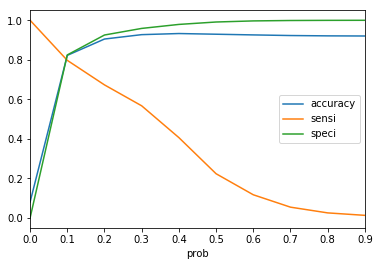

In [76]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [77]:
# here Churned_Prob > 0.1  
y_train_pred_final['final_predicted'] = y_train_pred_final.Churned_Prob.map( lambda x: 1 if x > 0.1 else 0)

y_train_pred_final.head()

,Churned,Churned_Prob,Customer ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.066669,39186,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.012667,39833,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.021248,38778,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.000022,43026,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.004561,12271,0,1,0,0,0,0,0,0,0,0,0,0


In [78]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churned, y_train_pred_final.final_predicted)

0.8222857142857143

In [79]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churned, y_train_pred_final.final_predicted )
confusion2

array([[15920,  3389],
       [  343,  1348]], dtype=int64)

In [80]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [81]:
print("Senstivity :", TP / float(TP+FN))
print("Specificty :" , TN / float(TN+FP))
print("False_positive_rate :", FP/ float(TN+FP))
print("Positive_predictive_value : ", TP / float(TP+FP))
print("Negative_predictive_value : ", TN / float(TN+ FN))

Senstivity : 0.7971614429331756
Specificty : 0.8244859909886582
False_positive_rate : 0.17551400901134187
Positive_predictive_value :  0.28456829216803886
Negative_predictive_value :  0.9789091803480293


### Random Forest

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=100)

In [83]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
 
lsvc = LinearSVC(C=0.001, penalty="l1", dual=False).fit(X_train, y_train)
model = SelectFromModel(lsvc, prefit=True)
X_lasso = model.transform(X_train)
pos = model.get_support(indices=True)
 ### Feature reduction using RFE
print(X_lasso.shape)
print(pos)

(21000, 17)
[ 1  4  5  6  7  8  9 10 11 12 13 14 16 17 19 28 31]


In [84]:
#feature vector for decision tree
lasso_features = list(churn_df.columns[pos])
print("Features for LASSO model buidling: ", lasso_features)

Features for LASSO model buidling:  ['arpu_8', 'total_og_mou_8', 'total_ic_mou_8', 'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'aon', 'aug_vbc_3g', 'monthly_2g_good', 'arpu_good', 'total_og_mou_good']


In [86]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt1 = DecisionTreeClassifier(max_depth=5)
dt1.fit(X_lasso, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [87]:
X_test = pd.DataFrame(data=X_test).iloc[:, pos]
y_pred1 = dt1.predict(X_test)

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

model_rf = RandomForestClassifier()
model_rf.fit(X_lasso, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print ('Randon Forest Accuracy with Default Hyperparameter',metrics.accuracy_score(y_test, prediction_test))

Randon Forest Accuracy with Default Hyperparameter 0.9406732585268304


In [90]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction_test))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      8251
           1       0.75      0.43      0.55       750

   micro avg       0.94      0.94      0.94      9001
   macro avg       0.85      0.71      0.76      9001
weighted avg       0.93      0.94      0.93      9001



In [91]:
# Printing confusion matrix
print(confusion_matrix(y_test, prediction_test))

[[8146  105]
 [ 429  321]]


Hyper Parameters tuning

max_depth

In [93]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_lasso, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(2, 20, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [94]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.155276,0.015834,0.009098,0.000947,2,{'max_depth': 2},0.940966,0.931905,0.941667,0.944048,...,0.940190,0.004267,3,0.940473,0.940833,0.941845,0.938810,0.940301,0.940452,0.000981
1,0.373947,0.026638,0.007809,0.002642,7,{'max_depth': 7},0.941443,0.934286,0.941905,0.950238,...,0.942571,0.005196,1,0.947675,0.950060,0.947381,0.945417,0.947920,0.947690,0.001479
2,0.509584,0.109029,0.009996,0.003831,12,{'max_depth': 12},0.942157,0.933333,0.942143,0.949048,...,0.941619,0.004989,2,0.965176,0.968095,0.964702,0.966310,0.967204,0.966298,0.001253
3,0.487307,0.045575,0.010665,0.004741,17,{'max_depth': 17},0.940728,0.933571,0.941190,0.945000,...,0.939714,0.003783,4,0.983451,0.988155,0.986250,0.985655,0.983453,0.985393,0.001787


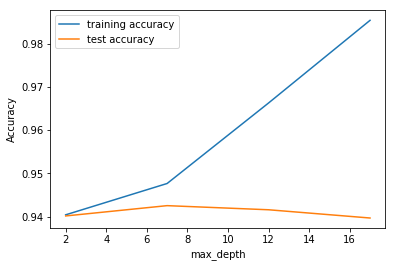

In [95]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Tuning min_samples_leaf

In [97]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(50, 400, 10)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_lasso, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': range(50, 400, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

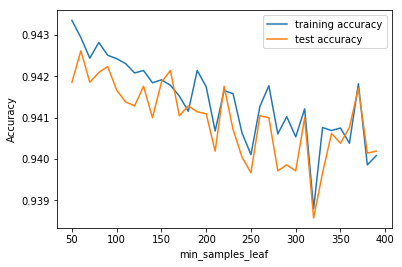

In [98]:
# scores of GridSearch CV
scores = rf.cv_results_

# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Tuning min_samples_split

In [100]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(100, 500, 25)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_lasso, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': range(100, 500, 25)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

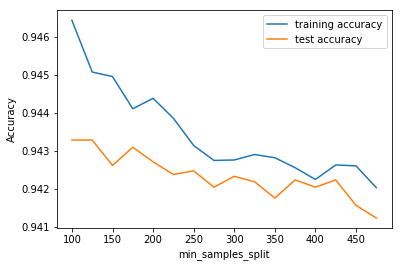

In [101]:
# scores of GridSearch CV
scores = rf.cv_results_

# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [102]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 300, 100),
    'min_samples_split': range(200, 500, 100),
    'n_estimators': [500,700], 
    'max_features': [10,20,25]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

model_rf = RandomForestClassifier(bootstrap=True,
                                  max_depth=10,
                                  min_samples_leaf=100, 
                                  min_samples_split=200,
                                  n_estimators=1000 ,
                                  oob_score = True, n_jobs = -1,
                                  random_state =50,
                                  max_features = 15,
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)

In [104]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,prediction_test))
print(confusion_matrix(y_test,prediction_test))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      5493
           1       0.72      0.43      0.54       508

   micro avg       0.94      0.94      0.94      6001
   macro avg       0.83      0.71      0.75      6001
weighted avg       0.93      0.94      0.93      6001

[[5408   85]
 [ 289  219]]


In [105]:
# accuracy score
print ('Accuracy Score for Random Forest Final Model :',metrics.accuracy_score(y_test, prediction_test))

Accuracy Score for Random Forest Final Model : 0.9376770538243626
